<a href="https://colab.research.google.com/github/kaleabendrias/data_sc/blob/main/spamornot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
spam_df = pd.read_csv("/content/emails.csv")
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [36]:
ham = spam_df[spam_df['spam'] == 0]

In [37]:
spam = spam_df[spam_df['spam'] == 1]


In [38]:
print('spam percentage = ', (len(spam) / len(spam_df))*100, '%')

spam percentage =  23.88268156424581 %


In [39]:
print('ham percentage = ', (len(ham) / len(spam_df))*100, '%')

ham percentage =  76.11731843575419 %


<Axes: ylabel='count'>

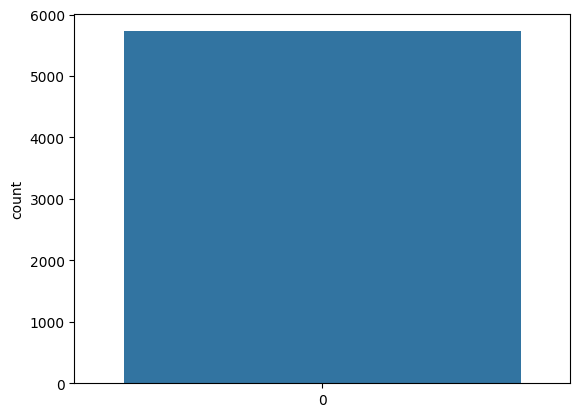

In [40]:
sns.countplot(spam_df['spam'], label = 'count spam vs ham')


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = [ 'This is the first document.', 'This document is second document','And this is the third one', 'Is this the first one']
sample_vectorizer = CountVectorizer()



In [49]:
x = sample_vectorizer.fit_transform(sample_data)

In [50]:
print(x.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 0 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 0 1 1 1 0 1 0 1]]


In [53]:
print(sample_vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


now lets do it on the code


In [54]:
vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text']
                                                   )

In [55]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


now lets watch the array rep


In [56]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [58]:
spamham_countvectorizer.shape

(5728, 37303)

37303 words

**now lets start training the model**

In [59]:
label = spam_df['spam'].values

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer, label)


MultinomialNB()

write ur own tests and try them on the model


In [60]:
testing_sample = ['Free money!', 'Hi kim let me know if you nedd any further info']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

test the model with the tests using .predict

In [61]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0])

# **lets divide into training and testing now**

In [62]:
from sklearn.model_selection import train_test_split

X = spamham_countvectorizer
y = label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [63]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# **now it is time for evaluation**

In [64]:
from sklearn.metrics import classification_report, confusion_matrix


In [65]:
y_predict_train = NB_classifier.predict(X_train)


array([0, 0, 0, ..., 0, 0, 0])

<Axes: >

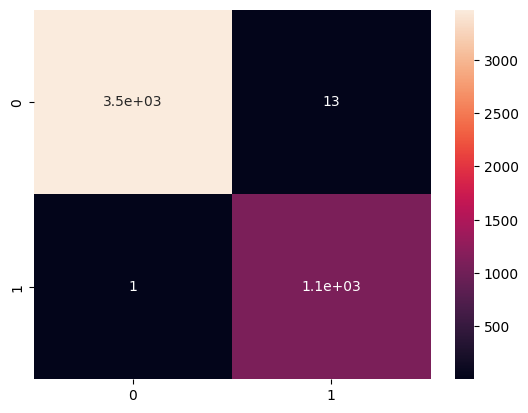

In [66]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<Axes: >

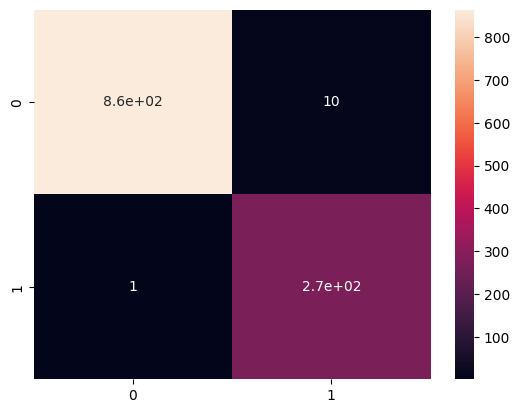

In [71]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [72]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       874
           1       0.96      1.00      0.98       272

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

